# **Titanic - Machine Learning from Disaster**

### Dataset description:

- **PassengerId**: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

- **Survived**: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

- **Pclass**: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

- **Name**: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

- **Sex**: Passenger's sex. It's either Male or Female.

- **Age**: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

- **SibSp**: Number of siblings or spouses travelling with each passenger.

- **Parch**: Number of parents of children travelling with each passenger.

- **Ticket**: Ticket number.

- **Fare**: How much money the passenger has paid for the travel journey.

- **Cabin**: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

- **Embarked**: Port from where the particular passenger was embarked/boarded.

### Load libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import re

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score

from sklearn.model_selection import GridSearchCV, cross_val_score

from xgboost import XGBClassifier



### Load data

In [2]:
# getting data
test_df = pd.read_csv("~/documents/titanic/test.csv")
train_df = pd.read_csv("~/documents/titanic/train.csv")

### View data

In [3]:
# viewing data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(test_df.shape) # 418
print(train_df.shape) # 891

# 30% of test data, 70% of training data

(418, 11)
(891, 12)


### Data Transformation

#### Missing Data and Feature Transforrmation

In [6]:
##missing values
print(np.sum(train_df.isnull()) == 0)
print(np.sum(test_df.isnull()) == 0)

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarked       False
dtype: bool
PassengerId     True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare           False
Cabin          False
Embarked        True
dtype: bool


##### 1) Age

In [7]:

train_df["Age"].isnull().sum() #177


177

In [8]:

# replace NA with age median

# define data I want to replace
data = [train_df, test_df]


for dataset in data:
    dataset['Age'] = dataset['Age'].fillna((dataset['Age'].median()))



###### 2) Embarked

In [9]:

# replace NA with most common value

train_df['Embarked'].describe()



count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [10]:

# replace embark with most common
value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(value)


###### 3) Cabin

In [11]:
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")

In [12]:

# From Cabin extract Deck number and drop Cabin
data = [train_df, test_df]



for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].fillna(0)
 
   
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)


##### 4) Title

In [13]:
data = [train_df, test_df]

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)



##### 5) Family Size

In [14]:
# combine information about parents and siblings

data = [train_df, test_df]

for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1 #+1 to count myself

##### 6) Fare

In [15]:
data = [train_df, test_df]


for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

##### Drop columns

In [16]:
#drop column passenger id

train_df.drop('PassengerId', axis=1, inplace=True)
# keep passenger id in test for kaggle submission 

# drop ticket

train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)


##### Output after transformarion

In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,U,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,U,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,C,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,U,Mr,1


In [18]:
train_df.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Deck           object
Title          object
FamilySize      int64
dtype: object

### Feature Exploration

- distribution of each feature
- correlation between features
- features versus survived rate

#### Feature Exploration

/Users/petramala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'FamilySize'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

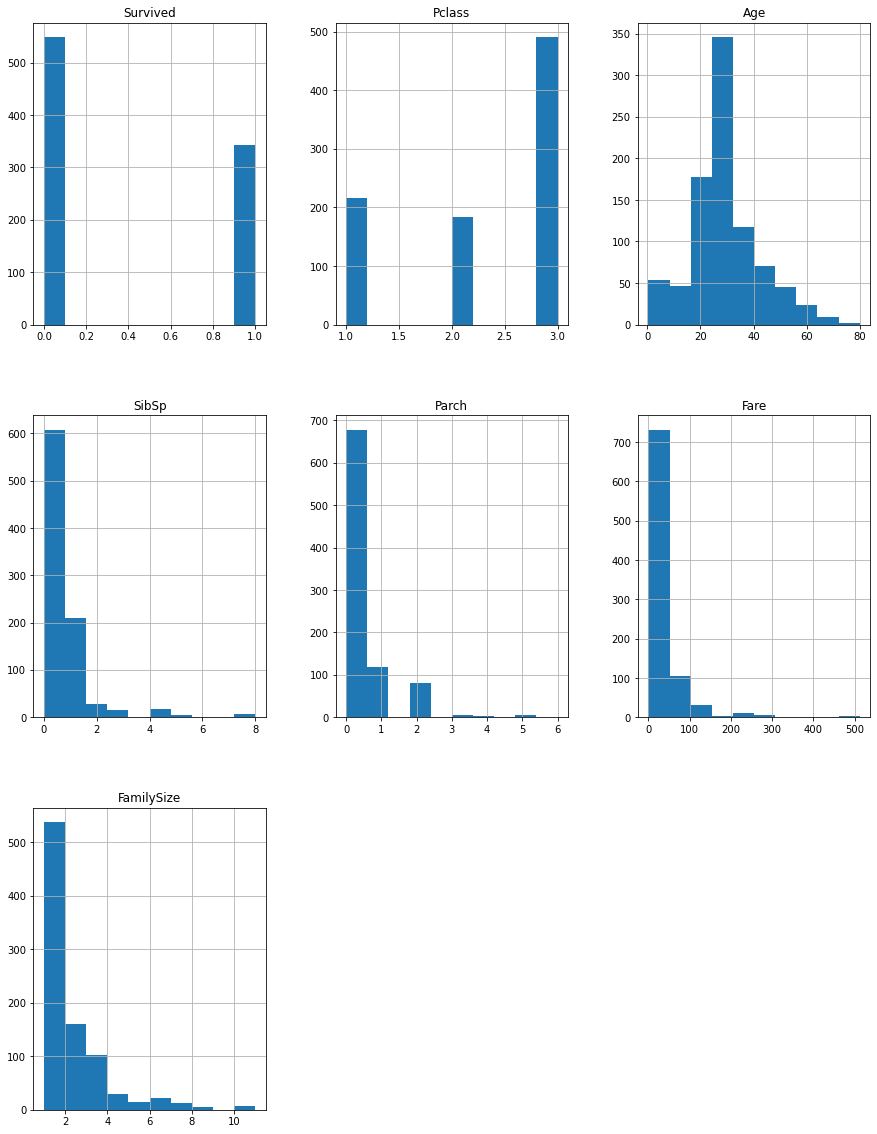

In [19]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_df.hist(ax = ax)

<AxesSubplot:xlabel='Title'>

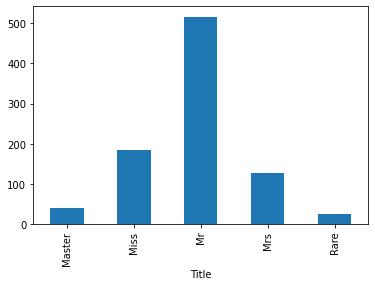

In [20]:
train_df.groupby('Title').Survived.count().plot(kind='bar')

<AxesSubplot:xlabel='Deck'>

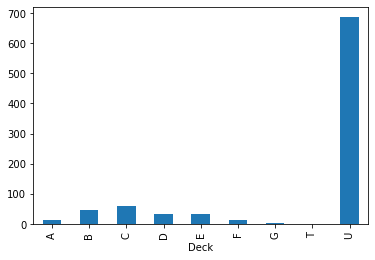

In [21]:
train_df.groupby('Deck').Survived.count().plot(kind='bar')

#### Relationship of each feature to survived

In [22]:
# Survived and not survived

survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

print(len(survived))
print(len(not_survived))
print(len(train_df))

# 38% survived

342
549
891


##### Parch

<AxesSubplot:xlabel='Parch'>

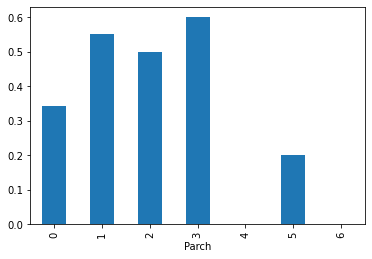

In [23]:
train_df.groupby('Parch').Survived.mean().plot(kind='bar')

##### Pclass

<AxesSubplot:xlabel='Pclass'>

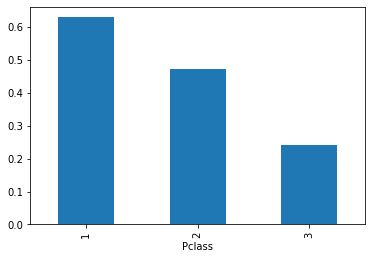

In [24]:
train_df.groupby('Pclass').Survived.mean().plot(kind='bar')

##### Embarked 

<AxesSubplot:xlabel='Embarked'>

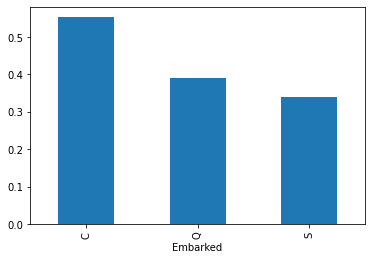

In [25]:
train_df.groupby('Embarked').Survived.mean().plot(kind='bar')

##### Sex

<AxesSubplot:xlabel='Sex'>

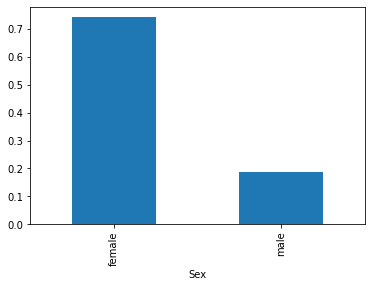

In [26]:
train_df.groupby('Sex').Survived.mean().plot(kind='bar')

##### SibSp

<AxesSubplot:xlabel='SibSp'>

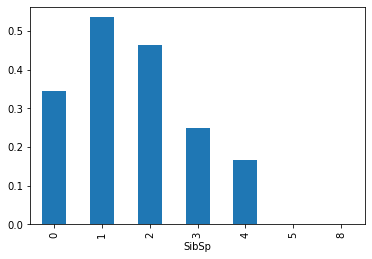

In [27]:
train_df.groupby('SibSp').Survived.mean().plot(kind='bar')

##### Sex and Pclass

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

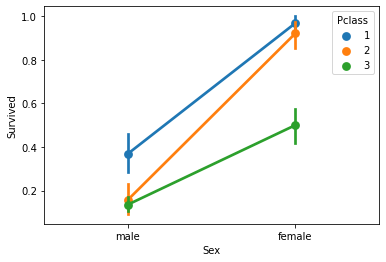

In [28]:
# relationship between sex, survivor and other features

sns.pointplot(x = 'Sex', y= 'Survived', hue='Pclass', height=4, aspect=2, data=train_df)


##### Sex and SibSp

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

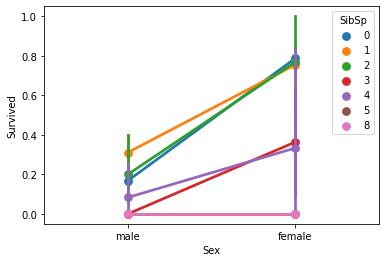

In [29]:
sns.pointplot(x = 'Sex', y = 'Survived', hue='SibSp', height=4, aspect=2, data=train_df)


##### Sex and Parch

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

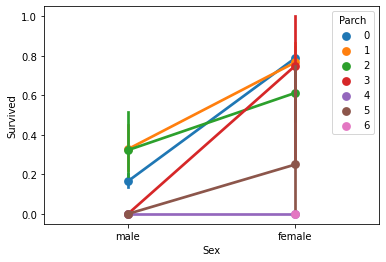

In [30]:
sns.pointplot(x = 'Sex', y = 'Survived', hue='Parch', height=4, aspect=2, data=train_df)


##### Sex and Embbarked

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

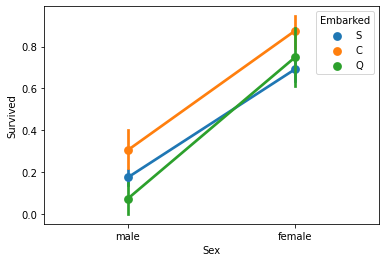

In [31]:
sns.pointplot(x = 'Sex', y = 'Survived', hue='Embarked', height=4, aspect=2, data=train_df)


##### Sex and SibSp

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

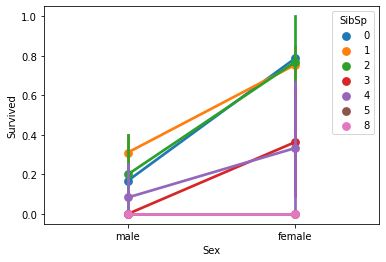

In [32]:
sns.pointplot(x = 'Sex', y = 'Survived', hue='SibSp', height=4, aspect=2, data=train_df)


##### Pclass and Embarked

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

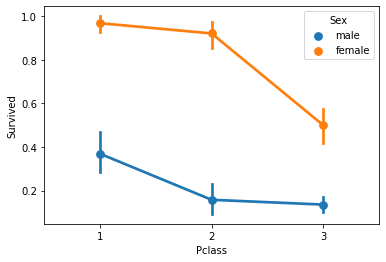

In [33]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_df)


##### Sex and Age

<AxesSubplot:xlabel='Sex', ylabel='Age'>

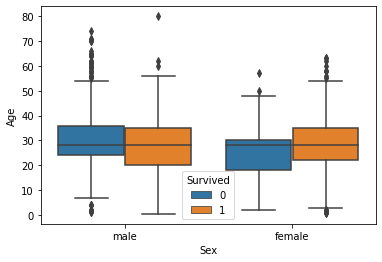

In [34]:
sns.boxplot(x="Sex",y="Age",hue="Survived",data=train_df)

In [35]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

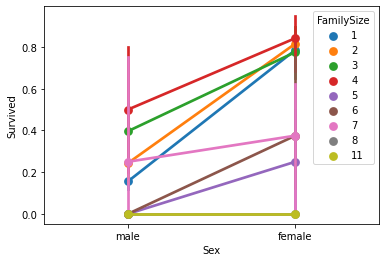

In [36]:
sns.pointplot(x = 'Sex', y = 'Survived', hue='FamilySize', height=4, aspect=2, data=train_df)


In [37]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fareband'] = pd.qcut(dataset['Fare'], 6)


#train_df[['Fareband', 'Survived']].groupby(['Fareband']).count() 

In [38]:
train_df[['Fareband', 'Survived']].groupby(['Fareband'], as_index=True).mean()


,Survived
Fareband,
"(-0.001, 7.775]",0.205128
"(7.775, 8.662]",0.190789
"(8.662, 14.454]",0.366906
"(14.454, 26.0]",0.436242
"(26.0, 52.369]",0.417808
"(52.369, 512.329]",0.697987


### Summary from data exploration

Dataset has 1/3 of survivors. Most recoreds are from Pclass 3 around 20 - 30 years old without siblings or children. Deck is unknown for majority of people. The most common title is Mr.


Relationship to surviving

- Embarked C (over 50%)
- Sex F (over 70%)
- Sibling 1 (over 50%), 2 (over 40%)
- Almost all women from class 1 and 2 survived
- Almost all men from class 2 and 3 died
- Almost all men with multiple siblings died
- Majority women up to 2 siblings survived
- Nearly all men with multiple parch died
- Nearly all men with embarked Q died
- Nearly all women with embarked S survived
- Passengers with higher fareband are more likely to survive
- Majority of men with large families or travelling alone died

### Data Preparation and feature selection for ML model

Convert categorical values into integers:
- Sex
- Fare
- Embarked
- Deck
- Title

Scale continuous values:


In [39]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,Fareband
0,0,3,male,22.0,1,0,7.2500,S,U,Mr,2,"(-0.001, 7.775]"
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,2,"(52.369, 512.329]"
2,1,3,female,26.0,0,0,7.9250,S,U,Miss,1,"(7.775, 8.662]"
3,1,1,female,35.0,1,0,53.1000,S,C,Mrs,2,"(52.369, 512.329]"
4,0,3,male,35.0,0,0,8.0500,S,U,Mr,1,"(7.775, 8.662]"


In [40]:
# Fare

data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.662), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26.0), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.369), 'Fare'] = 4
    dataset.loc[ dataset['Fare'] > 52.369, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    



In [41]:
# Sex

sex = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex)


In [42]:
# Embarked

embarked = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [43]:
# Titles

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

data = [train_df, test_df]

for dataset in data:
    dataset['Title'] = dataset['Title'].map(titles)


In [44]:
# Deck

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T":8, "U": 9}

data = [train_df, test_df]

for dataset in data:
    dataset['Deck'] = dataset['Deck'].map(deck)


In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,Fareband
0,0,3,0,22.0,1,0,0,0,9,1,2,"(-0.001, 7.775]"
1,1,1,1,38.0,1,0,5,1,3,3,2,"(52.369, 512.329]"
2,1,3,1,26.0,0,0,1,0,9,2,1,"(7.775, 8.662]"
3,1,1,1,35.0,1,0,5,0,3,3,2,"(52.369, 512.329]"
4,0,3,0,35.0,0,0,1,0,9,1,1,"(7.775, 8.662]"


<AxesSubplot:>

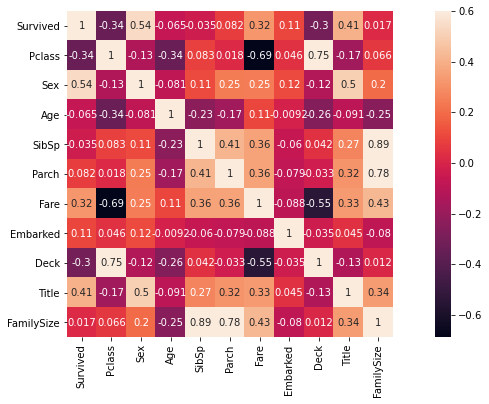

In [46]:
plt.figure(figsize=(15,6))
sns.heatmap(train_df.corr(), vmax=0.6, square=True, annot=True)

In [47]:
# we can now Parch the fareband feature
train_df = train_df.drop(['Parch'], axis=1)
test_df = test_df.drop(['Parch'], axis=1)

# we can now drop the fareband feature
train_df = train_df.drop(['SibSp'], axis=1)
test_df = test_df.drop(['SibSp'], axis=1)




In [48]:
# we can now drop the fareband feature
train_df = train_df.drop(['Fareband'], axis=1)
test_df = test_df.drop(['Fareband'], axis=1)

<AxesSubplot:>

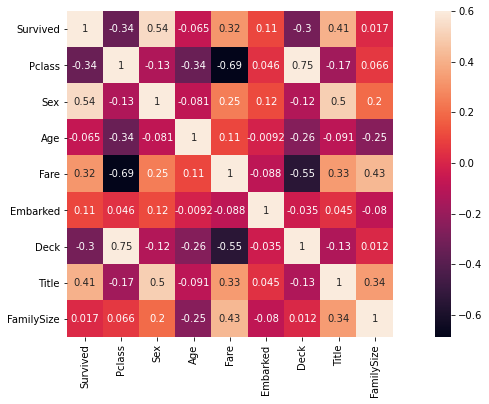

In [49]:
plt.figure(figsize=(15,6))
sns.heatmap(train_df.corr(), vmax=0.6, square=True, annot=True)

# Deck and Pclass correlated
# Pclass and Fare


In [50]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySize
0,0,3,0,22.0,0,0,9,1,2
1,1,1,1,38.0,5,1,3,3,2
2,1,3,1,26.0,1,0,9,2,1
3,1,1,1,35.0,5,0,3,3,2
4,0,3,0,35.0,1,0,9,1,1


In [51]:
train_df.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare            int64
Embarked        int64
Deck            int64
Title           int64
FamilySize      int64
dtype: object

In [52]:
data = [train_df, test_df]

for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)



In [53]:
data = [train_df, test_df]

for dataset in data:
  dataset['Deck'] = dataset['Deck'].astype(int)


### ML Alghorithm

In [54]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

#### Stochastic Gradient Descent (SGD)

In [68]:
# Stochastic Gradient Descent (SGD):

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print (acc_sgd)


67.79


#### Random Forest

In [69]:
# Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

96.07


#### Logistic Regression

In [70]:
# Logistic Regression:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred_lr = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

81.48


#### K Nearest Neighbor

In [71]:
# K Nearest Neighbor:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

87.88


#### Gaussian Naive Bayes

In [72]:
# Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred_gnb = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(acc_gaussian)

78.9


#### Perceptron

In [73]:
# Perceptron:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred_p = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(acc_perceptron)

79.69


/Users/petramala/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


#### Linear. Support Vector Machine

In [74]:
# Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred_svm = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

79.46


/Users/petramala/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Decision Tree

In [75]:
# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred_dt = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

print(acc_decision_tree)

96.07


#### XGBoost

In [79]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred_xg = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)

print(acc_xgb)

[19:28:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
94.95


#### Model Evaluation

In [81]:
# best model

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree', 'XGBoost'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree, acc_xgb]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
96.07,Random Forest
96.07,Decision Tree
94.95,XGBoost
87.88,KNN
81.48,Logistic Regression
79.69,Perceptron
79.46,Support Vector Machines
78.90,Naive Bayes
67.79,Stochastic Gradient Decent


### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Random Forest model has an average accuracy of 81% with a standard deviation of 5%. 

### Feature Importance

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

In [ ]:
importances.plot.bar()


### Hyperparameter Tuning

##### Random Forest

In [ ]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)

criterion = ["gini", "entropy"]
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(criterion = criterion, n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, Y_train)


In [ ]:
bestF.best_params_

In [82]:
# Random Forest
model = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 2,   
                                       n_estimators=100,
                                       max_depth = 5
                                     )

model.fit(X_train, Y_train)

Y_pred_rf = model.predict(X_test)

model.score(X_train, Y_train)
acc_model = round(model.score(X_train, Y_train) * 100, 2)
print(acc_model)

84.29


##### XGBoost

In [88]:
from sklearn.model_selection import RandomizedSearchCV


# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(X_train, Y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
[19:33:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/petramala/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:33:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

[19:33:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

[19:33:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

[19:33:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

[19:33:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

[19:33:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

[19:33:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.6s finished


In [89]:
#Best parameters found:  {'n_estimators': 8, 'max_depth': 9, 'learning_rate': 0.4, 'colsample_bytree': 0.7}
#Best accuracy found:  0.8518563406455784

# XGBoost
xgb = XGBClassifier(n_estimators = 8, 
                   colsample_bytree = 0.7,   
                   learning_rate=0.4,
                   max_depth = 9)

xgb.fit(X_train, Y_train)
Y_pred_xg = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)

print(acc_xgb)

[19:37:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
89.56


### Confusion Matrix

In [83]:
# Random Forest
predictions = cross_val_predict(model, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

#490 correctly - not survived
# 251 - correctly survived

array([[490,  59],
       [ 91, 251]])

In [90]:
# XGB
predictions = cross_val_predict(xgb, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

#500 correctly - not survived
# 249 - correctly survived

[19:38:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/petramala/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([[500,  49],
       [ 93, 249]])

The first row is about the not-survived-predictions: 476 passengers were correctly classified as not survived (called true negatives) and 73 where wrongly classified as not survived (false positives).
The second row is about the survived-predictions: 95 passengers where wrongly classified as survived (false negatives) and 247 where correctly classified as survived (true positives).

### Precision and Recall

In [91]:

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8355704697986577
Recall: 0.7280701754385965


Our model predicts passengers survival correctly 77% time (precision). The recall tells us that it predicted the survival of 72% of the people who actually survived.

### F-Score

In [92]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.778125

In [ ]:
X_test.head()

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

There we have it, a 100 % F-score. Unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

### Exporting test prediction

In [93]:
submission_4 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_xg
    })

submission_4.to_csv('submission_4.csv', index=False)

In [94]:
submission_4.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### References

More on:

- Hyperparameter Tuning

- Precision Recall Curve

- ROC AUC Curve

- ROC AUC Score

Source: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
        
- Model Description

Source: https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide